In [1]:
#Immport Libraries
import pandas as pd
%matplotlib inline

In [2]:
#Import Files
df = pd.read_csv('covid_19_data.csv', encoding='cp1252',usecols=[1, 3, 5, 6, 7])
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0


In [3]:
#Add Columns
df['Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
0,01/22/2020,Mainland China,1.0,0.0,0.0,1.0
1,01/22/2020,Mainland China,14.0,0.0,0.0,14.0
2,01/22/2020,Mainland China,6.0,0.0,0.0,6.0
3,01/22/2020,Mainland China,1.0,0.0,0.0,1.0
4,01/22/2020,Mainland China,0.0,0.0,0.0,0.0


In [4]:
#Verify data types
df.dtypes

ObservationDate     object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
Active             float64
dtype: object

In [5]:
# Math analysis for numeric columns
df.describe()

,Confirmed,Deaths,Recovered,Active
count,25205.000000,25205.000000,25205.000000,25205.000000
mean,5275.427296,345.354215,1567.041143,3363.031938
std,22400.758681,2139.884446,10194.363887,17025.606413
min,0.000000,0.000000,0.000000,-250747.000000
25%,16.000000,0.000000,0.000000,6.000000
50%,173.000000,2.000000,6.000000,65.000000
75%,1219.000000,22.000000,158.000000,752.000000
max,345813.000000,33998.000000,250747.000000,317935.000000


In [6]:
## Verify if it's correct
df['ObservationDate'].value_counts()

05/14/2020    377
05/15/2020    377
05/13/2020    324
05/02/2020    323
05/08/2020    323
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: ObservationDate, Length: 115, dtype: int64

In [7]:
## Change the type of columns
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
Active                    float64
dtype: object

In [10]:
#Data for Italy
df_italy = df[df['Country/Region'] == 'Italy'].copy()
df_italy.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
480,2020-01-31,Italy,2.0,0.0,0.0,2.0
539,2020-02-01,Italy,2.0,0.0,0.0,2.0
608,2020-02-02,Italy,2.0,0.0,0.0,2.0
675,2020-02-03,Italy,2.0,0.0,0.0,2.0
743,2020-02-04,Italy,2.0,0.0,0.0,2.0


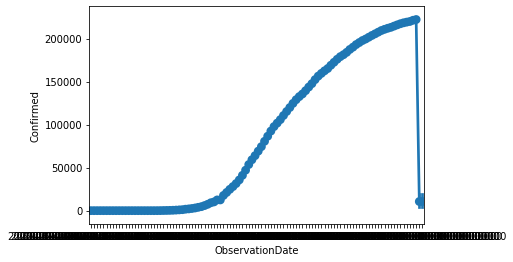

In [17]:
import seaborn as sns
sns.pointplot(x='ObservationDate', y='Confirmed', data=df_italy)

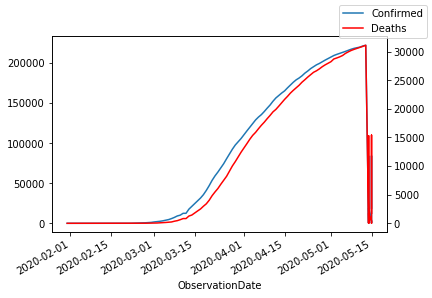

In [19]:
import matplotlib.pyplot as plt

ax = df_italy.plot(x="ObservationDate", y="Confirmed", legend=False)
ax2 = ax.twinx()
df_italy.plot(x="ObservationDate", y="Deaths", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()